In [ ]:
# First, Extract all images from the ZIP files
# Since we need both for test and production, we extract both
import zipfile
import shutil
file1 = zipfile.ZipFile("readonly/small_img.zip")
file2 = zipfile.ZipFile("readonly/images.zip")
# Remove old directories if they already exist
try:
    shutil.rmtree("small_imgs/")
except:
    pass
try:
    shutil.rmtree("images/")
except:
    pass

# Extraction of the images!
file1.extractall("small_imgs/")
file2.extractall("images/")
print("Extraction Successful!")

In [ ]:
import os
print(os.listdir("small_imgs/"))
print(os.listdir("images/"))

In [21]:
# Now, we need to OCR the images
# We will use pytesseract for this
# We will also use PIL to convert the images to RGB
from PIL import Image
import pytesseract
import cv2 as cv
import os

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
# We will use the following function to OCR the images
def ocr_image(image):
    image = Image.open(image)
    image = image.convert("RGB")
    image = image.resize((image.width, image.height), Image.LANCZOS)
    # Convert to grayscale
    image = image.convert('L')
    # OCR the image
    text = pytesseract.image_to_string(image)
    return text

# Now, save the text in a dictionary, in a json file
import json
# Create a dictionary
data = {}
# Iterate over the images
dir = input("Enter the directory: ")
for image in os.listdir(dir):
    # Get the text
    print(f"Getting text from {image}")
    text = ocr_image(dir+"/"+image)
    # Add the text to the dictionary
    data[image] = text

    
# Save the dictionary to a json file
with open(f"{dir}.json", "w") as f:
    json.dump(data, f, indent=4)

Getting text from a-0.png
Getting text from a-1.png
Getting text from a-10.png
Getting text from a-11.png
Getting text from a-12.png
Getting text from a-13.png
Getting text from a-2.png
Getting text from a-3.png
Getting text from a-4.png
Getting text from a-5.png
Getting text from a-6.png
Getting text from a-7.png
Getting text from a-8.png
Getting text from a-9.png


In [7]:
from PIL import Image
import pytesseract
import cv2 as cv
import os
# We got all the ocr data in the json file
# now, time to search for the images
# We will use the following function to search for the images containing the given text
def get_faces(input_text):
    import json
    import cv2 as cv
    import numpy as np
    dir = "images"
    text = input_text

    json_file = json.load(open(f"{dir}.json", "r"))
    def search(text):
        result = []
        if text is None:
            return result
        for image in json_file:
            if text.lower() in json_file[image].lower():
                result.append(image)
        return result
                
    face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')
    # Now, we will use the following function to search for the images containing the given text
    contains = search(text)
    # Now, we will display the faces in the images
    for image in contains:
        results = []
        print(f"Results found in file {image}")
        img = Image.open(dir+"/"+image)
        img = img.convert("RGB")
        # to grayscale
        img_arr = np.array(img)
        face = face_cascade.detectMultiScale(np.array(img),1.3,4)
        for x, y, w, h in face:
            face_image = img.crop((x, y, x+w, y+h))
            face_image.thumbnail((128, 128))
            results.append(face_image)
        contact_sheet = Image.new(img.mode,(128*5, 128*int(np.ceil(len(face)/5))))
        x = 0
        y = 0
        if results == []:
            print("But there were no faces in that file!")
            continue
        for face in results:
            face.save("face.png")
            contact_sheet.paste(face, (x, y))
            if x+128 == contact_sheet.width:
                x = 0
                y += 128
            else:
                x += 128
        # save the contact sheet
        display(contact_sheet)


Results found in file a-0.png


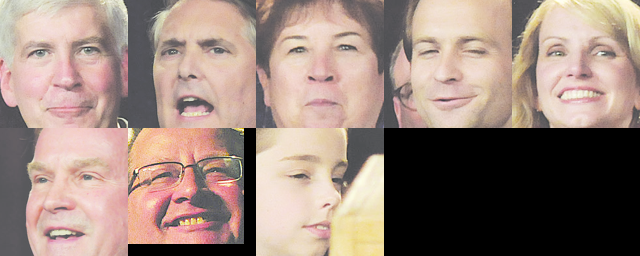

Results found in file a-3.png


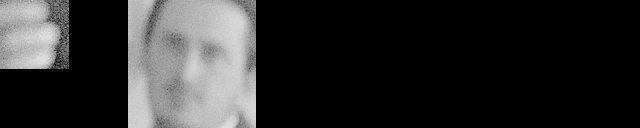

Results found in file a-9.png


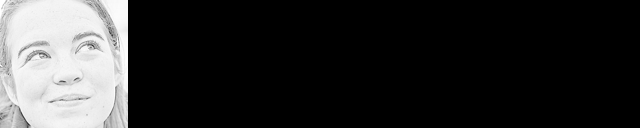

Mark:
Results found in file a-0.png


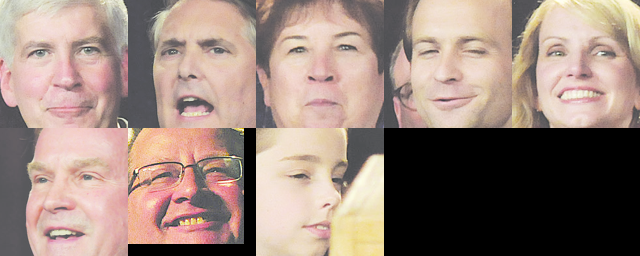

Results found in file a-1.png


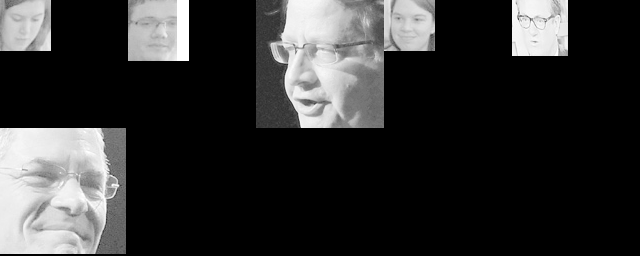

Results found in file a-10.png
But there were no faces in that file!
Results found in file a-13.png


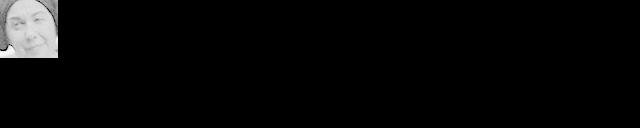

Results found in file a-2.png


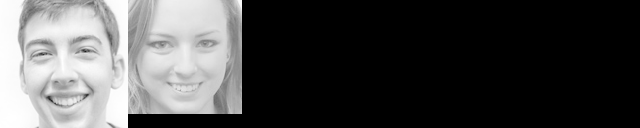

Results found in file a-3.png


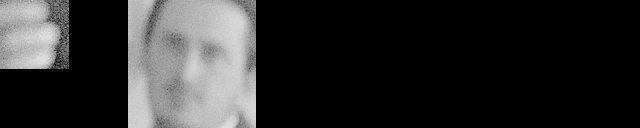

Results found in file a-5.png


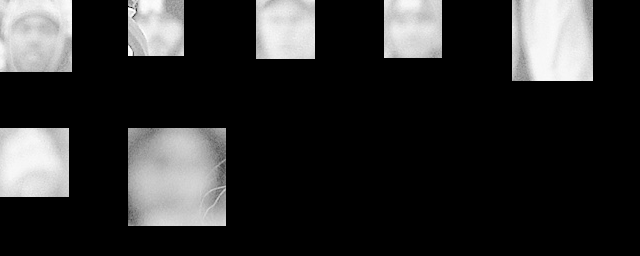

Results found in file a-8.png
But there were no faces in that file!
Results found in file a-9.png


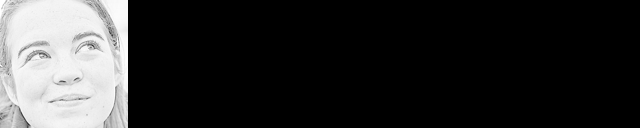

In [8]:
from PIL import Image
import pytesseract
import cv2 as cv
import os
get_faces("chris")
print("Mark:")
get_faces("Mark")